In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import (
    RandomForestClassifier,
    AdaBoostClassifier,
    BaggingClassifier,
    ExtraTreesClassifier,
)
from sklearn.decomposition import PCA, KernelPCA
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, set_link_color_palette
from sklearn.feature_selection import SelectKBest, SelectFromModel, f_classif

# DataSet

In [2]:
df = pd.DataFrame(
    pd.read_csv(
        "../top_Gads_updated.dat",
        header=None,
        comment="#",
        sep="\s+",
        squeeze=True,
        names=["material", "adsorbate", "DF_lower", "DF_upper", "DF"],
    )
)

df = df[["material", "adsorbate", "DF"]]
aminoacid = df["adsorbate"].unique()

n = {}
for i in aminoacid:
    n[i] = list(df[df.adsorbate == i]["DF"])
X = pd.DataFrame(n)
aminoacids_label = list(df["adsorbate"].unique())
material_label = list(df["material"].unique())
X.index = material_label

# Data Preparation

In [3]:
X.rename(columns={"C3H6": "PRP", "C4H6": "BUT-2", "C4H8": "BUT-1"}, inplace=True)
X.columns.unique()

Index(['ALA', 'ARG', 'ASN', 'ASP', 'CHL', 'CYM', 'CYS', 'DGL', 'EST', 'ETA',
       'GAN', 'GLN', 'GLU', 'GLY', 'HID', 'HIE', 'HIP', 'ILE', 'LEU', 'LYS',
       'MET', 'PHE', 'PHO', 'PRO', 'SER', 'THR', 'TRP', 'TYR', 'VAL', 'PRP',
       'BUT-2', 'BUT-1'],
      dtype='object')

In [5]:
X.rename(
    index={
        "C_amorph-1": "C-AM-1",
        "C_amorph-2": "C-AM-2",
        "C_amorph-3": "C-AM-3",
        "CNT15-COO--10": "CNT-COO$^{-}$-high",
        "CNT15-COO--3": "CNT-COO$^{-}$-low",
        "CNT15-COOH-30": "CNT-COOH-high",
        "CNT15-COOH-3": "CNT-COOH-low",
        "CNT15-NH2-14": "CNT-NH$_{2}$-high",
        "CNT15-NH2-2": "CNT-NH$_{2}$-low",
        "CNT15-NH3+-4": "CNT-NH$_{3}^{+}$-high",
        "CNT15-NH3+-2": "CNT-NH$^{+}_{3}$-low",
        "CNT15-OH-14": "CNT-OH-high",
        "CNT15-OH-4": "CNT-OH-low",
        "CNT15": "CNT",
        "Fe2O3-001O": "Fe$_{2}$O$_{3}$(001)",
        "graphene": "GR",
        "bi-graphene": "bi-GR",
        "tri-graphene": "tri-GR",
        "grapheneoxide": "GO",
        "redgrapheneoxide": "rGO",
        "SiO2-Q2": "SiO$_{2}$-Q2",
        "SiO2-Q4": "SiO$_{2}$-Q4",
        "TiO2-rut-110": "TiO$_{2}$-rut(110)",
        "TiO2-ana-101": "TiO$_{2}$-ana(101)",
        "TiO2-rut-100": "TiO$_{2}$-rut(100)",
        "TiO2-ana-100": "TiO$_{2}$-ana(100)",
        "TiO2-ana-101-NB": "TiO$_{2}$-ana(101)-NB",
        "ZnO-1010": "ZnO(10$\overline{1}}$0)",
        "ZnO-1210": "ZnO(1$\overline{2}}$10)",
        "ZnS-110": "ZnS(110)",
        "ZnS-110-coated": "ZnS(110)-coated",
    },
    inplace=True,
)

# Biomolecules AgglomerativeClustering

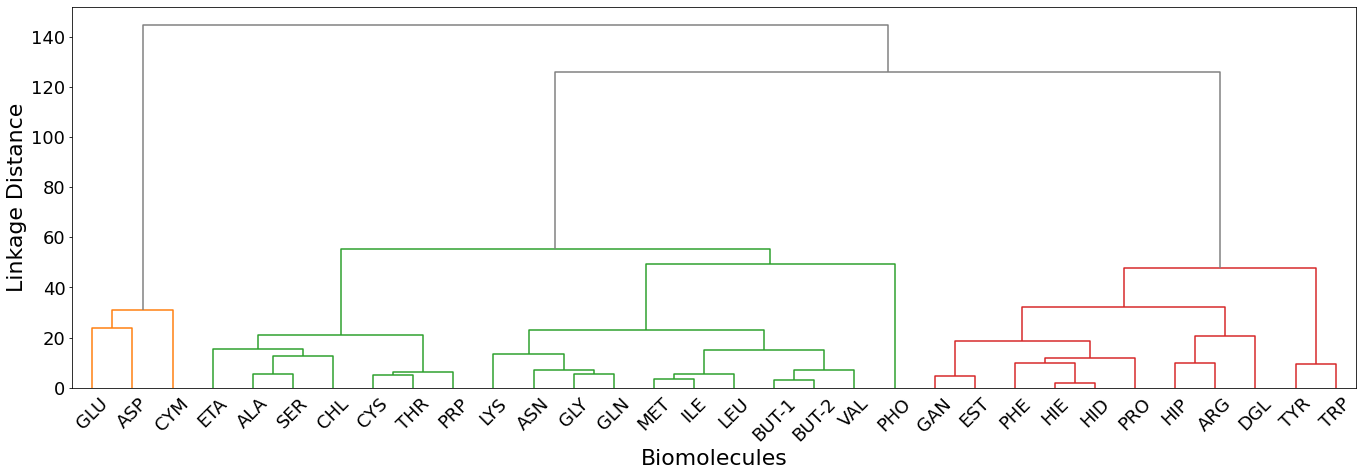

In [6]:
##plot
plt.figure(figsize=(23, 7))
dendrogram(
    linkage(X.T, "ward", optimal_ordering=True),
    labels=X.columns.unique(),
    above_threshold_color="gray",
)
set_link_color_palette(["green", "blue", "red"])
plt.xlabel("Biomolecules", fontsize=22)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.ylabel("Linkage Distance", fontsize=22)
plt.savefig("cluster-aminoacids.png", format="png", dpi=1500, bbox_inches="tight")

#  Biomolecules Kmeans clustering and Distances to center of each cluster

In [9]:
##KMeans
X_new = X.T
model = KMeans(n_clusters=3, random_state=10)
kmeanpred = model.fit_predict(X_new)
Distance = model.transform(X_new)
# print(Distance.shape)
X_new["D0"] = Distance[:, 0]
X_new["D1"] = Distance[:, 1]
X_new["D2"] = Distance[:, 2]
X_new["CLASS"] = kmeanpred
X_new[X_new.CLASS == 0].D0
X_new[X_new.CLASS == 1].D1
X_new[X_new.CLASS == 2].D2

/usr/local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


ASP    12.152623
CYM    17.963725
GLU    17.320241
Name: D2, dtype: float64

# Nanomaterials AgglomerativeClustering (full data set) 

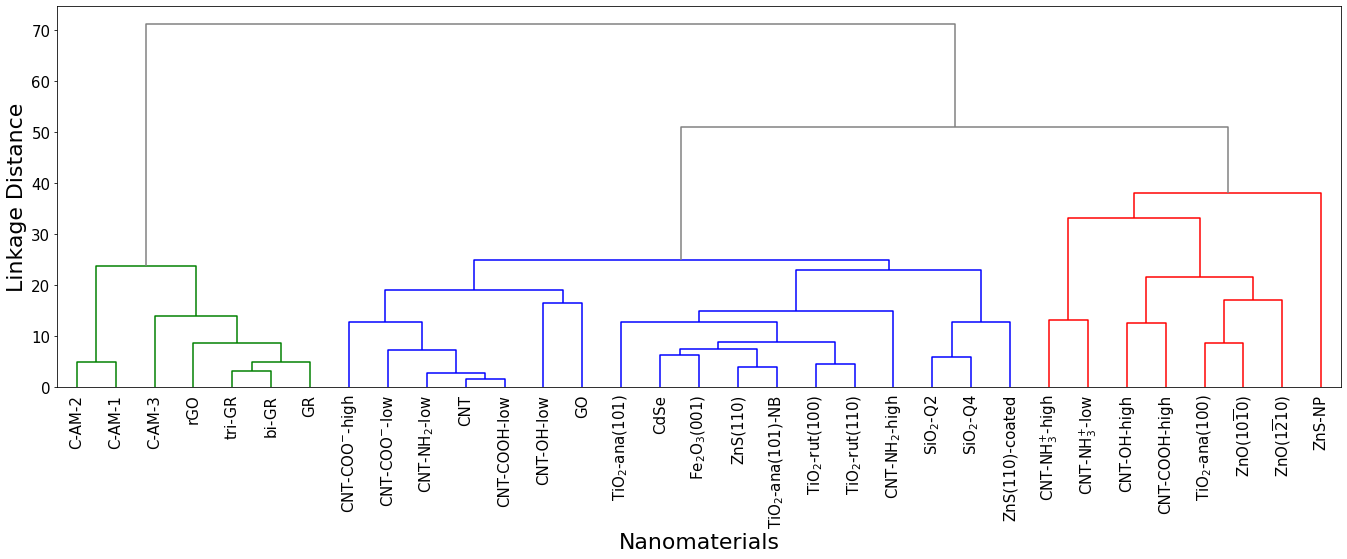

In [10]:
##plot
plt.figure(figsize=(23, 7))
dendrogram(
    linkage(X, method="weighted", optimal_ordering=True),
    labels=X.index,
    color_threshold=38,
    above_threshold_color="gray",
)
set_link_color_palette(["green", "blue", "red"])  #
plt.xlabel("Nanomaterials", fontsize=22)
plt.ylabel("Linkage Distance", fontsize=22)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(rotation=90)
plt.savefig("cluster-surfaces.png", format="png", dpi=1000, bbox_inches="tight")

# Nanomaterials AgglomerativeClustering (predicted data set) 

In [11]:
main = ["ASP", "VAL", "PRO", "ETA", "PHO"]
rest = [i for i in X.columns if i not in main]


def Mary_pred(i):
    Y = X[i]
    model = LinearRegression()
    model.fit(X[main], Y)
    ytest_pred = model.predict(X[main])
    return ytest_pred


X_new = X
for i in rest:
    X_new[i] = Mary_pred(i)

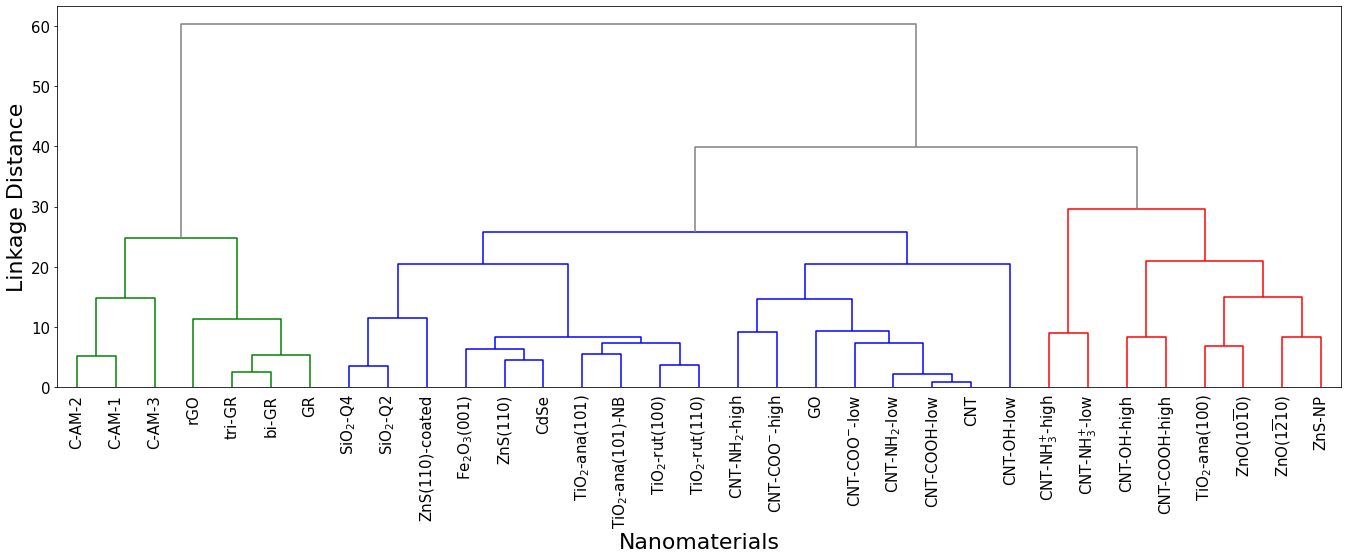

In [12]:
##plot
plt.figure(figsize=(23, 7))
dendrogram(
    linkage(X_new, method="weighted", optimal_ordering=True),
    labels=X.index,
    color_threshold=35,
    above_threshold_color="gray",
)
set_link_color_palette(["green", "blue", "red"])
plt.xlabel("Nanomaterials", fontsize=22)
plt.ylabel("Linkage Distance", fontsize=22)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(rotation=90)
plt.savefig(
    "cluster-surfaces-prediction.png", format="png", dpi=1000, bbox_inches="tight"
)